# 311 Clean Data

In [1]:
#------------------------------------------------#
# Dependencies
#------------------------------------------------#
import os
import csv
import pandas as pd
import numpy as np
import json 
import requests
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.font_manager import FontProperties

In [2]:
#------------------------------------------------#
# CSV Time
#------------------------------------------------#

# Store the CSV filepath in a variable
the311 = "Resources/311Data.csv"

# Now, read the data from the 311 CSV into a DataFrame
the311_pd = pd.read_csv(the311, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

# Preview the DataFrame, but only 20 rows
the311_pd.head(20)

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
3,38139574,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,MANHATTAN,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
4,38151954,1/8/2018 10:16,Department of Transportation,Bus Stop Shelter Complaint,Snow Removal Requested,Bus Stop Shelter,KINGSBOROUGH COMMUNITY COLLEGE,BROOKLYN,11235,40.57790383,-73.93535012,"(40.577903827726615, -73.93535012227942)"
5,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
7,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,MANHATTAN,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
8,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,BROOKLYN,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"


In [3]:
#------------------------------------------------#
# Complaint-o-rama
#------------------------------------------------#

# First, let's check out the Top 5 Complaint Types Overall
top5_comps = the311_pd['Complaint Type'].value_counts().head()
preview_top5_df = pd.DataFrame(top5_comps)
preview_top5_df

,Complaint Type
Noise - Park,38
DPR Internal,31
Violation of Park Rules,22
Maintenance or Facility,21
Taxi Complaint,11


In [4]:
# K, now make it an expanded DataFrame
top5_comps = top5_comps.index.values
top5_comps_df = the311_pd.loc[the311_pd['Complaint Type'].isin(top5_comps)]
top5_comps_df.count()  
top5_comps_df

# plt.bar(top5_compln_df['Borough'],top5_compln_df['Complaint Type'])

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
3,38139574,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,MANHATTAN,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
5,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
7,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,MANHATTAN,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
8,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,BROOKLYN,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
13,38271358,1/21/2018 15:28,Department of Parks and Recreation,Violation of Park Rules,Obstructing Public Use,Park,FLUSHING MEADOWS CORONA PARK,QUEENS,11368,40.74237706,-73.84215698,"(40.742377064999275, -73.84215697754966)"


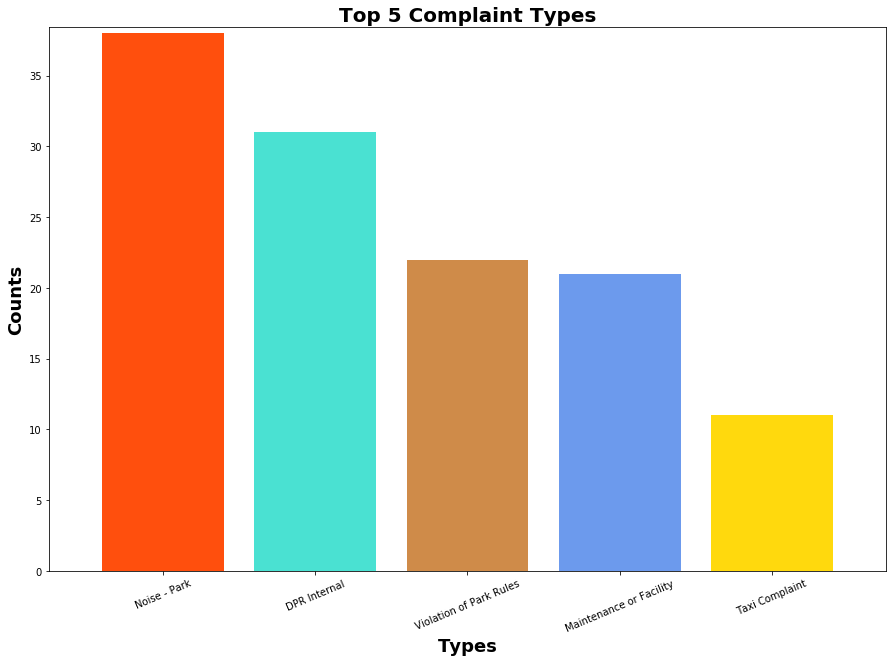

In [5]:
# Make a Bar Graph of the Top 5 Overall Complaint Info
top5types = ["Noise - Park", "DPR Internal", "Violation of Park Rules", "Maintenance or Facility", "Taxi Complaint"]
typecounts = [38, 31, 22, 21, 11]
x_axis = np.arange(len(typecounts))

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(top5types, typecounts, align="center", color=['orangered', 'turquoise', 'peru', 'cornflowerblue', 'gold'], alpha=0.95)
plt.title("Top 5 Complaint Types", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Types", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xticks(x_axis, top5types, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.show()

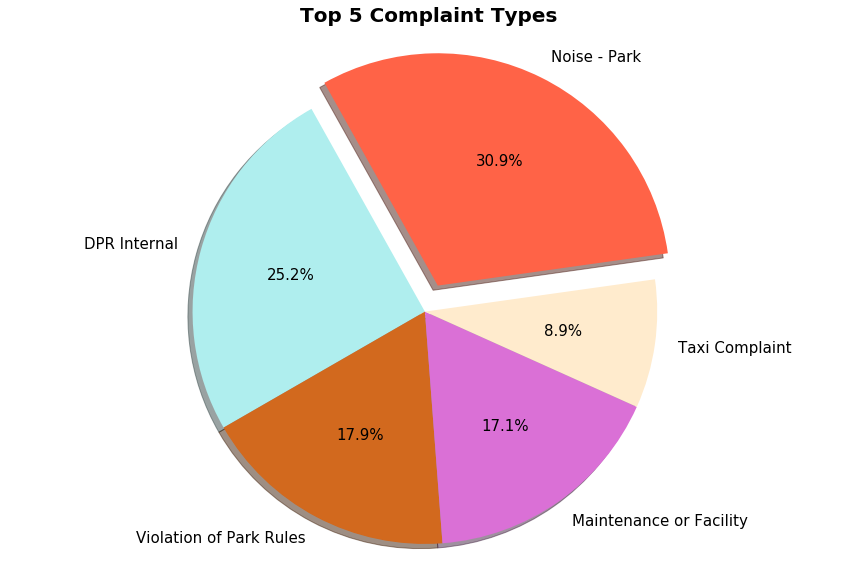

In [6]:
# Yay! Now turn it into a pie chart with %s!
top5types = ["Noise - Park", "DPR Internal", "Violation of Park Rules", 
             "Maintenance or Facility", "Taxi Complaint"]
typecounts = [38, 31, 22, 21, 11]
colors = ["tomato", "paleturquoise", "chocolate", "orchid", "blanchedalmond"]
explode = (0.125,0,0,0,0)

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Types", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15}, explode=explode, labels=top5types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=8,)
plt.axis("equal")
plt.show()

In [35]:
# Next, we will focus on the Top 5 Complaints by Borough
top5_bors_df = top5_comps_df.set_index("Borough")
top5_bors_df.count()  
top5_bors_df

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Incident Zip,Latitude,Longitude,Location
Borough,,,,,,,,,,,
MANHATTAN,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
QUEENS,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
QUEENS,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
MANHATTAN,38139574,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
QUEENS,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
MANHATTAN,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
MANHATTAN,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
BROOKLYN,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
MANHATTAN,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"


In [39]:
#k, now get your info to make the bar plot
top5_bors_df = top5_comps_df.groupby(['Borough', 'Complaint Type'])
top5_bors_df = top5_bors_df.count()
top5_bors_df

Unique Key  Created Date  Agency Name  \
Borough       Complaint Type                                                   
BRONX         DPR Internal                      2             2            2   
              Maintenance or Facility           3             3            3   
              Noise - Park                      1             1            1   
              Violation of Park Rules           4             4            4   
BROOKLYN      DPR Internal                      8             8            8   
              Maintenance or Facility           3             3            3   
              Noise - Park                     10            10           10   
              Taxi Complaint                    1             1            1   
              Violation of Park Rules           4             4            4   
MANHATTAN     DPR Internal                     14            14           14   
              Maintenance or Facility          11            11           11   
              Noise - Park                     24            24           24   
              Taxi Complaint                    1             1            1   
              Violation of Park Rules           7             7            7   
QUEENS        DPR Internal                      7             7            7   
              Maintenance or Facility           3             3            3   
              Noise - Park                      2             2            2   
              Taxi Complaint                    9             9            9   
              Violation of Park Rules           6             6            6   
STATEN ISLAND Maintenance or Facility           1             1            1   
              Noise - Park                      1             1            1   
              Violation of Park Rules           1             1            1   

                                       Descriptor  Location Type  Landmark  \
Borough       Complaint Type                                                 
BRONX         DPR Internal                      2              2         2   
              Maintenance or Facility           3              3         3   
              Noise - Park                      1              1         1   
              Violation of Park Rules           4              4         4   
BROOKLYN      DPR Internal                      8              8         8   
              Maintenance or Facility           3              3         3   
              Noise - Park                     10             10        10   
              Taxi Complaint                    1              1         1   
              Violation of Park Rules           4              4         4   
MANHATTAN     DPR Internal                     14             14        14   
              Maintenance or Facility          11             11        11   
              Noise - Park                     24             24        24   
              Taxi Complaint                    1              1         1   
              Violation of Park Rules           7              7         7   
QUEENS        DPR Internal                      7              7         7   
              Maintenance or Facility           3              3         3   
              Noise - Park                      2              2         2   
              Taxi Complaint                    9              9         9   
              Violation of Park Rules           6              6         6   
STATEN ISLAND Maintenance or Facility           1              1         1   
              Noise - Park                      1              1         1   
              Violation of Park Rules           1              1         1   

                                       Incident Zip  Latitude  Longitude  \
Borough       Complaint Type                                               
BRONX         DPR Internal                        2         2          2   
              Mai

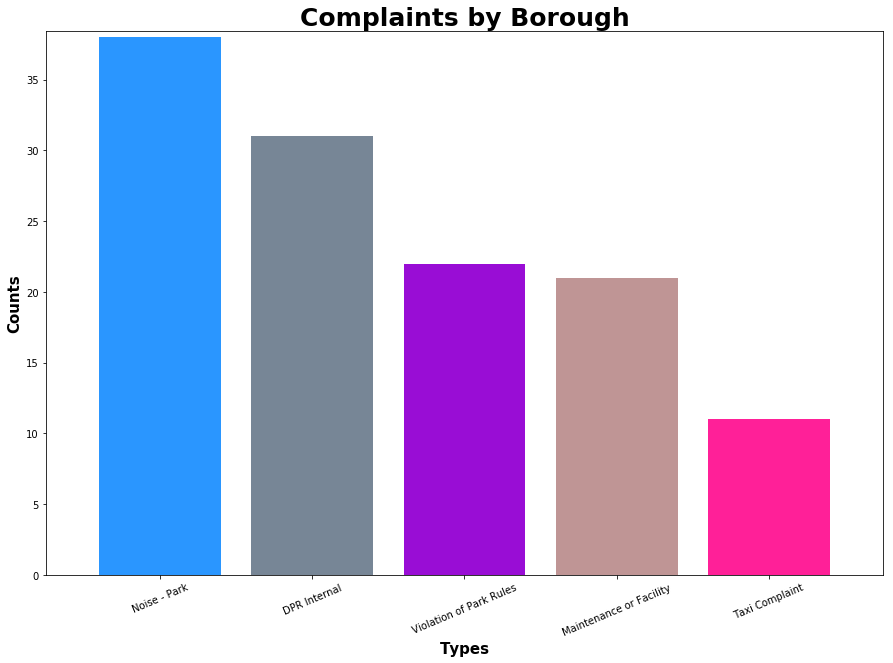

In [47]:
# Make a Bar Graph of Complaint Counts by Borough -- ##Working copy - data is not represented correctedly here
boroughs = ["MANHATTAN", "QUEENS", "BROOKLYN", "BRONX", "STATEN ISLAND"]
# top5types = ["Noise - Park", "DPR Internal", "Violation of Park Rules", "Maintenance or Facility", "Taxi Complaint"] 
borcounts = [57, 27, 26, 10, 3]
# bortypecounts = [57, 27, 26, 10, 3]
x_axis = np.arange(len(typecounts))


# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
# plot1 = plt.bar(ind, top5types, typecounts, width, align="center", color=['firebrick', 
#                                                      'tomato', 
#                                                      'chocolate', 
#                                                      'goldenrod',
#                                                      'darkslateblue'], alpha=0.95)

plot2 = plt.bar(boroughs, typecounts, align="center", color=['dodgerblue', 
                                                     'slategray', 
                                                     'darkviolet', 
                                                     'rosybrown',
                                                     'deeppink'], 
                                                      alpha=0.95,)

plt.title("Complaints by Borough", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel("Types", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(x_axis, top5types, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.show()